In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
# Importing the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df['length'] = df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


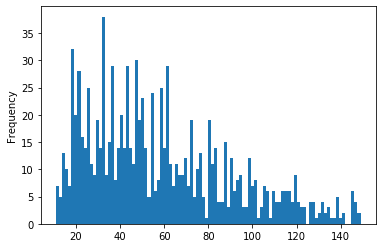

In [4]:
df['length'].plot(bins=100,kind='hist') 


In [5]:
df.length.describe()


count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [6]:
#Longest review
df[df['length'] == 149]['Review'].iloc[0]


'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [7]:
#Shortest review
df[df['length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c492ac10>,
      dtype=object)

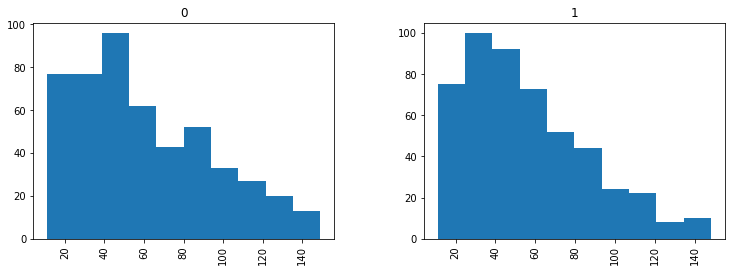

In [8]:
df.hist(column='length', by='Liked',figsize=(12,4))


In [9]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
lemma = WordNetLemmatizer()
corpus = []

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [10]:
corpus

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like burge

In [11]:
# Creating the Bag of Words model


from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2))
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Naive Bayes

In [13]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [14]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score


y_pred = mnb.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)*100
print("Accuracy: {}".format(accuracy1))

Accuracy: 75.5


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[74, 23],
       [26, 77]])

In [16]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=None)
print(report)


              precision    recall  f1-score   support

           0       0.74      0.76      0.75        97
           1       0.77      0.75      0.76       103

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



# Using ANN

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [19]:
# all_words = []
# all_reviews = []
# for i in range(len(corpus)):
#     reviews_split = corpus[i].split()
#     all_reviews.append(reviews_split)

# for i in all_reviews:
#     all_words += i

In [21]:
#Encoding words

# from collections import Counter
# ## Build a dictionary that maps words to integers 
# counts = Counter(all_words)

# vocab = sorted(counts, key=counts.get, reverse=True)
# print(vocab)

In [31]:
max_features = 1000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Review'].values)
X = tokenizer.texts_to_sequences(df['Review'].values)
X = pad_sequences(X)
X[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        428, 165,   8,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        586,   7,  12,  16]], dtype=int32)

In [32]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 128)           128000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 383,194
Trainable params: 383,194
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
Y = pd.get_dummies(df['Liked']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 30) (800, 2)
(200, 30) (200, 2)


In [34]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
7/7 [==============================] - 1s 156ms/step - loss: 0.6926 - accuracy: 0.5100
Epoch 2/15
7/7 [==============================] - 1s 167ms/step - loss: 0.6824 - accuracy: 0.5700
Epoch 3/15
7/7 [==============================] - 1s 168ms/step - loss: 0.6560 - accuracy: 0.7362
Epoch 4/15
7/7 [==============================] - 1s 158ms/step - loss: 0.5818 - accuracy: 0.7300
Epoch 5/15
7/7 [==============================] - 1s 161ms/step - loss: 0.4936 - accuracy: 0.8025
Epoch 6/15
7/7 [==============================] - 1s 156ms/step - loss: 0.3810 - accuracy: 0.8263
Epoch 7/15
7/7 [==============================] - 1s 159ms/step - loss: 0.2940 - accuracy: 0.8963
Epoch 8/15
7/7 [==============================] - 1s 157ms/step - loss: 0.2377 - accuracy: 0.9100
Epoch 9/15
7/7 [==============================] - 1s 157ms/step - loss: 0.1922 - accuracy: 0.9400
Epoch 10/15
7/7 [==============================] - 1s 174ms/step - loss: 0.1388 - accuracy: 0.9563
Epoch 11/15
7/7 [==

In [35]:
Y_pred = np.argmax(model.predict(X_test,batch_size = batch_size), axis=-1)

In [36]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix: ",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix:  [[79 17]
 [26 78]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        96
           1       0.82      0.75      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



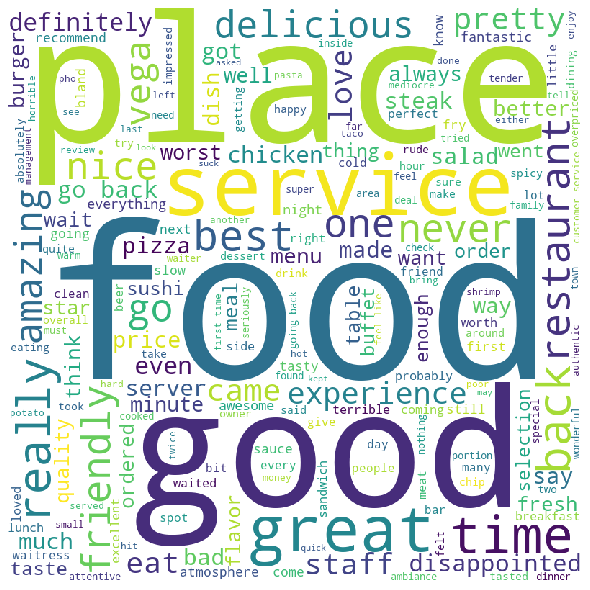

In [37]:
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(" ".join(corpus))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 